# El paquete "statsmodels" para regresiones lineales simples

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Carguemos el dataset de "Advertising.csv"
ads = pd.read_csv("C:/Users/neosb/Downloads/python-ml-course-master/datasets/ads/Advertising.csv")
ads

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [3]:
# Importamos del paquete "statsmodels" el sub-paquete "formula.api"
import statsmodels.formula.api as smf

In [48]:
# OLS = "Ordinary Least Squares"
lm = smf.ols(formula = "Sales~TV" , data = ads).fit()

In [14]:
type(lm)

statsmodels.regression.linear_model.RegressionResultsWrapper

In [15]:
lm.params

Intercept    7.032594
TV           0.047537
dtype: float64

* Para el caso de "Sales~TV", el modelo de predicción sera:

<div align="center">
	<font size=4>
        $"Sales" = 7.032594 + 0.047537"TV"$
	<font/>
<div/>

In [16]:
ads["TV"]

0      230.1
1       44.5
2       17.2
3      151.5
4      180.8
       ...  
195     38.2
196     94.2
197    177.0
198    283.6
199    232.1
Name: TV, Length: 200, dtype: float64

In [17]:
# Utilizar el modelo de regresión generado para predecir el valor de 
# las ventas respecto a la variable "TV"
sales_pred = lm.predict(ads["TV"])
sales_pred

0      17.970775
1       9.147974
2       7.850224
3      14.234395
4      15.627218
         ...    
195     8.848493
196    11.510545
197    15.446579
198    20.513985
199    18.065848
Length: 200, dtype: float64

Text(0.5, 1.0, 'Publicidad en TV vs Ventas')

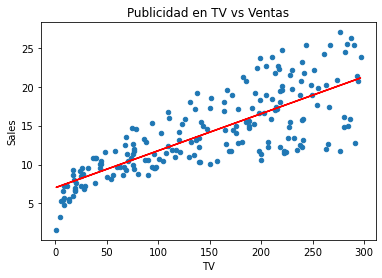

In [18]:
ads.plot(kind = "scatter", x = "TV", y = "Sales")
plt.plot(ads["TV"], sales_pred, c="red")
plt.title("Publicidad en TV vs Ventas")

In [19]:
print("R2 = ", lm.rsquared)

R2 =  0.611875050850071


In [21]:
lm2 = smf.ols(formula = "Sales~Radio" , data = ads).fit()
lm2.params

Intercept    9.311638
Radio        0.202496
dtype: float64

In [22]:
s2 = lm2.predict(ads["Radio"])
s2

0      16.965979
1      17.269722
2      18.606195
3      17.674714
4      11.498593
         ...    
195    10.060872
196    10.303867
197    11.194849
198    17.816461
199    11.053102
Length: 200, dtype: float64

Text(0.5, 1.0, 'Publicidad en Radio vs Ventas')

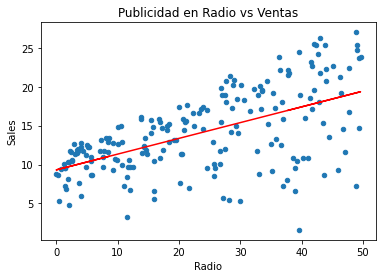

In [23]:
ads.plot(kind = "scatter", x = "Radio", y = "Sales")
plt.plot(ads["Radio"], s2, c="red")
plt.title("Publicidad en Radio vs Ventas")

In [24]:
print( "R2 = ", lm2.rsquared)

R2 =  0.33203245544529525


R2 =  0.05212044544430516


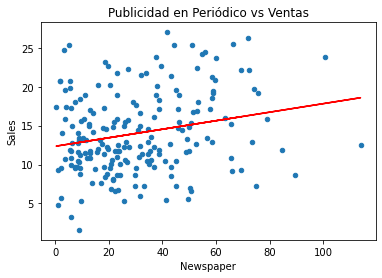

In [25]:
lm3 = smf.ols(formula = "Sales~Newspaper" , data = ads).fit()
s3 = lm3.predict(ads["Newspaper"])
ads.plot(kind = "scatter", x = "Newspaper", y = "Sales")
plt.plot(ads["Newspaper"], s3, c="red")
plt.title("Publicidad en Periódico vs Ventas")
print( "R2 = ", lm3.rsquared)

In [26]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Fri, 03 Oct 2025   Prob (F-statistic):           1.47e-42
Time:                        18:39:08   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* El **coeficiente de determinación ajustado** ($\bar{R}^2$ o $R_{adj}^2$) se utiliza en el caso de los modelos de regresión múltiple para ver el grado de intensidad o efectividad que tienen las variables independientes en explicar la variable dependiente. Dicho coeficiente se calcula como:

<div align="center">
	<font size=4>
        $\bar{R}^2 = 1-[\frac{n-1}{n-k-1}](1-R^2)$
	<font/>
<div/>

In [27]:
lm_multiple = smf.ols(formula = "Sales~TV+Newspaper" , data = ads).fit()

In [28]:
lm_multiple.params

Intercept    5.774948
TV           0.046901
Newspaper    0.044219
dtype: float64

<div align="center">
	<font size=4>
        $"Sales" = 5.774948 + 0.046901"TV" + 0.044219"Newspaper"$
	<font/>
<div/>

In [29]:
print("R2 = ", lm_multiple.rsquared)
print("R2_adj = ", lm_multiple.rsquared_adj)

R2 =  0.6458354938293271
R2_adj =  0.6422399150864777


In [30]:
lm_multiple2 = smf.ols(formula = "Sales~TV+Radio" , data = ads).fit()
lm_multiple2.params

Intercept    2.921100
TV           0.045755
Radio        0.187994
dtype: float64

In [31]:
print("R2 = ", lm_multiple2.rsquared)
print("R2_adj = ", lm_multiple2.rsquared_adj)

R2 =  0.8971942610828956
R2_adj =  0.8961505479974428


In [35]:
lm_multiple3 = smf.ols(formula = "Sales~Newspaper+Radio" , data = ads).fit()
lm_multiple3.params

Intercept    9.188920
Newspaper    0.006644
Radio        0.199045
dtype: float64

In [36]:
print("R2 = ", lm_multiple3.rsquared)
print("R2_adj = ", lm_multiple3.rsquared_adj)

R2 =  0.33270518395032256
R2_adj =  0.3259306172899197


In [37]:
lm_multiple4 = smf.ols(formula = "Sales~TV+Newspaper+Radio" , data = ads).fit()
lm_multiple4.params

Intercept    2.938889
TV           0.045765
Newspaper   -0.001037
Radio        0.188530
dtype: float64

In [38]:
print("R2 = ", lm_multiple4.rsquared)
print("R2_adj = ", lm_multiple4.rsquared_adj)

R2 =  0.8972106381789522
R2_adj =  0.8956373316204668


In [41]:
print("Sales~TV ->", lm.rsquared) # Sales~TV
print("Sales~TV+Newspaper ->", lm_multiple.rsquared) # Sales~TV+Newspaper
print("Sales~Newspaper+Radio ->", lm_multiple3.rsquared) # Sales~Newspaper+Radio
print("Sales~TV+Radio ->", lm_multiple2.rsquared) # Sales~TV+Radio
print("Sales~TV+Radio+Newspaper ->", lm_multiple4.rsquared) # Sales~TV+Radio+Newspaper

Sales~TV -> 0.611875050850071
Sales~TV+Newspaper -> 0.6458354938293271
Sales~Newspaper+Radio -> 0.33270518395032256
Sales~TV+Radio -> 0.8971942610828956
Sales~TV+Radio+Newspaper -> 0.8972106381789522


In [42]:
# Calculo del RSE
def RSE_rate(lm, X,Y):
    Y_e = lm.predict(X)
    SSD = np.sum((Y-Y_e)**2)
    RSE = np.sqrt(SSD/(len(X)-len(X.columns.values.tolist())-1))
    RSE_rate = RSE/np.mean(Y)
    return RSE_rate

In [43]:
RSE_TV_News = RSE_rate(lm_multiple, ads[["TV","Newspaper"]], ads["Sales"])
RSE_TV_News

0.22255089037282122

In [44]:
RSE_TV_Radio = RSE_rate(lm_multiple2, ads[["TV","Radio"]], ads["Sales"])
RSE_TV_Radio

0.11990450436855059

In [45]:
RSE_News_Radio = RSE_rate(lm_multiple3, ads[["Newspaper","Radio"]], ads["Sales"])
RSE_News_Radio

0.3054820485353732

In [46]:
RSE_TV_Radio_News = RSE_rate(lm_multiple4, ads[["TV","Radio","Newspaper"]], ads["Sales"])
RSE_TV_Radio_News

0.1202004188564624